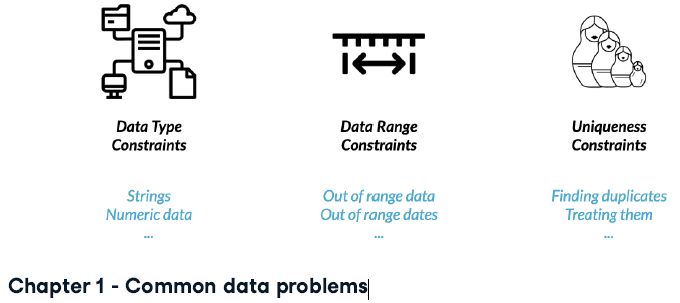

In [ ]:
"""

In this chapter, you'll learn how to overcome some of the most common dirty data problems. 
You'll convert data types, apply range constraints to remove future data points, and remove 
duplicated data points to avoid double-counting.


"""

## Data Type Constraints

In [11]:
"""
General Approach:
1) Check the data type (df.dtypes)
2) Find Number of missing values (df.info())
3) Make sure formats of the datatype are aligned
4) Use Assert Statement to ensure the validity of alignment

"""

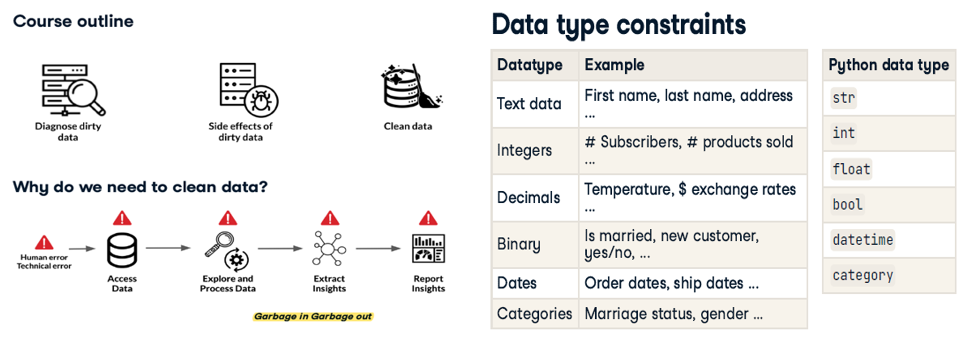

In [12]:
import pandas as pd

sales = pd.read_csv('./Data/sales.csv', index_col = 0)
sales.head()

,sale_date,sales_order_id,revenue,quantity
0,1/19/2020,123451,1000$,122
1,10/24/2019,123452,3400$,250
2,12/25/2017,123453,5400$,240
3,12/21/2026,123454,7600$,100
5,10/25/2017,123455,8400$,150


In [286]:
sales.dtypes

sale_date         object
sales_order_id     int64
revenue           object
quantity           int64
dtype: object

In [287]:
# Print the information of sales
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 9
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   sale_date       9 non-null      object
 1   sales_order_id  9 non-null      int64 
 2   revenue         9 non-null      object
 3   quantity        9 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 360.0+ bytes


In [288]:
# Print sum of all Revenue column
sales['revenue'].sum()

'1000$3400$5400$7600$8400$9500$9600$9900$8800$'

### Removing "$" sign from column & align data types

In [289]:
# Remove $ from Revenue column

sales['revenue'] = sales['revenue'].str.strip('$')
sales['revenue'] = sales['revenue'].astype('int')

# First I removed '$' sign using strip comman, and using astype command
# .. I converted into the desired data type('int')

### Verify that Revenue is now an integer

In [290]:
assert sales['revenue'].dtype == 'int'

"""
We can make sure that the Revenue column is now an integer by using the 
assert statement, which takes in a condition as input, as returns nothing 
if that condition is met, and an error if it is not.

"""

sales.dtypes

sale_date         object
sales_order_id     int64
revenue            int32
quantity           int64
dtype: object

## Data Range constraints

In [291]:
# Convert revenue to integer

sales['revenue'] = sales['revenue'].astype('int')

In [292]:
# Set sales > 9000 to = 9000
sales.loc[sales['revenue'] > 9000, 'revenue'] == 9000

6    False
7    False
8    False
Name: revenue, dtype: bool

In [293]:
# Reconvert sales revenue back to categorical

sales['revenue'] = sales['revenue'].astype("category")

In [294]:
print(sales['revenue'].describe())

count        9
unique       9
top       1000
freq         1
Name: revenue, dtype: int64


In [295]:
# Convert sale date to datetime
sales['sale_date'] = pd.to_datetime(sales['sale_date'])

# Save today's date
today = dt.date.today()
today = pd.to_datetime(today)

# Set all in the future to today's date
sales.loc[sales['sale_date'] > today, 'sale_date'] = today

print(sales['sale_date'].max())

2021-12-25 00:00:00


## Uniqueness constraints

In [13]:
import pandas as pd

sales2 = pd.read_csv('./Data/sales2.csv', index_col = 0)
sales2.head()

,sale_date,sales_order_id,revenue,quantity
0.0,1/19/2020,123451.0,1000$,122.0
1.0,10/24/2019,123452.0,3400$,250.0
2.0,12/25/2017,123453.0,5400$,240.0
3.0,12/21/2026,123454.0,7600$,100.0
4.0,10/25/2017,123455.0,8400$,150.0


### Finding duplicates

In [3]:
duplicates = sales2.duplicated(subset = 'sale_date', keep = False)

In [4]:
duplicated_rides = sales2[duplicates].sort_values(by = 'sale_date')

In [5]:
print(duplicated_rides[['sale_date', 'revenue']].head(6))

       sale_date revenue
4.0   10/25/2017   8400$
5.0   10/25/2017   8400$
7.0   11/29/2028   9600$
8.0   11/29/2028   9600$
9.0     8/9/2017   9900$
10.0    8/9/2017   9900$


### Treating duplicates

### Drop Complete duplicates

In [7]:
# Drop complete duplicates from sales2

sales2_dup = sales2.drop_duplicates()
print(sales2_dup.head())

      sale_date  sales_order_id revenue  quantity
0.0   1/19/2020        123451.0   1000$     122.0
1.0  10/24/2019        123452.0   3400$     250.0
2.0  12/25/2017        123453.0   5400$     240.0
3.0  12/21/2026        123454.0   7600$     100.0
4.0  10/25/2017        123455.0   8400$     150.0


In [8]:
# Create statistics dictionary for aggregation function

statistics = {'revenue': "mean", 'quantity': 'max', 'quantity': 'min'}

In [9]:
# Group by ride_id and compute new statistics

sales2_unique = sales2_dup.groupby(by = 'sales_order_id').agg(statistics).reset_index()

TypeError: Could not convert 1000$ to numeric

In [1]:
#---------------------------------------------------#

In [ ]:
# Python Pandas Tutorial (Part 10): Working with Dates and Time Series Data
# https://www.youtube.com/watch?v=UFuo7EHI8zc


# Data Cleaning In Python (Practical Examples)
# https://www.youtube.com/watch?v=vPaXbA_xQFQs

In [71]:
# https://www.kaggle.com/deepak525/investigate-tmdb-movie-dataset/data

import pandas as pd
import matplotlib.pyplot as plt

movies = pd.read_csv('./Data/movies_new.csv')
movies.head(3)

,budget,revenue,original_title,genres,release_date,vote_average,release_year
0,150000000.0,1.513529e+09,Jurassic World,Action|Adventure|Science Fiction|Thriller,6/9/2015,12.5,2025.0
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,5/13/2015,7.1,2023.0
2,110000000.0,2.952382e+08,Insurgent,Adventure|Science Fiction|Thriller,3/18/2015,6.3,2020.0


In [79]:
print(movies.release_date.head())

0      6/9/2015
1     5/13/2015
2     3/18/2015
3    12/15/2015
4      4/1/2015
Name: release_date, dtype: object


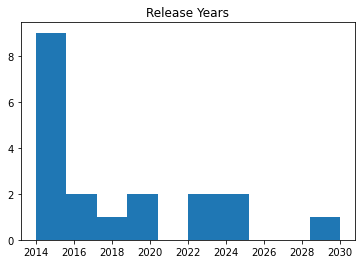

In [73]:
plt.hist(movies['release_year']);
plt.title('Release Years');

In [80]:
from datetime import datetime

# current date and time
now = datetime.now()

s1 = now.strftime("%m/%d/%Y")
# mm/dd/YY H:M:S format
print(s1)

12/25/2021


In [89]:
# from datetime import datetime
from datetime import datetime

today = datetime.now()

today = today.strftime("%m/%d/%Y")


# https://stackoverflow.com/questions/40837724/convert-typestring-to-pandas-core-series-series
now = pd.Series(today)
print(type(now))

# https://www.statology.org/pandas-can-only-compare-identically-labeled-series-objects/
# movies.release_date.reset_index(drop = True) < now.reset_index(drop =  True)

# movies.release_date.reset_index(drop=True) < now.reset_index(drop=True)

<class 'pandas.core.series.Series'>


In [78]:
# import datetime as dt
# today_date = dt.date.today()
# # movies.release_date.reset_index(drop = True)
# print(today_date)

2021-12-25


In [47]:
# now.reset_index(drop=True) == (movies.release_date.reset_index(drop=True))

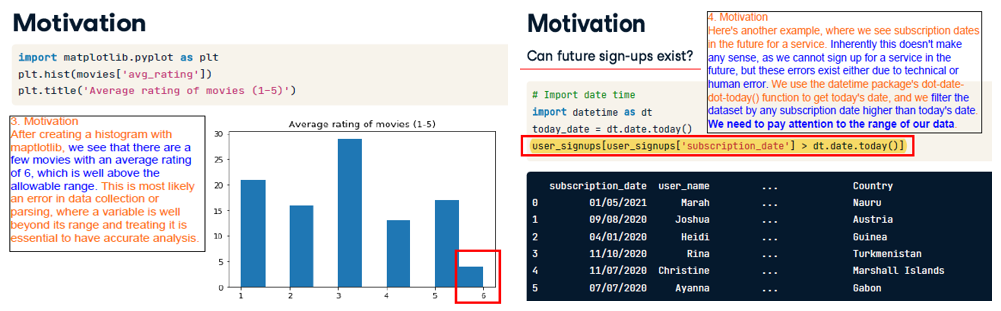

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

movies = pd.read_csv('./Data/movies_new.csv')
movies.head(3)

,budget,revenue,original_title,genres,release_date,vote_average,release_year
0,150000000.0,1.513529e+09,Jurassic World,Action|Adventure|Science Fiction|Thriller,6/9/2015,12.5,2025.0
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,5/13/2015,7.1,2023.0
2,110000000.0,2.952382e+08,Insurgent,Adventure|Science Fiction|Thriller,3/18/2015,6.3,2020.0


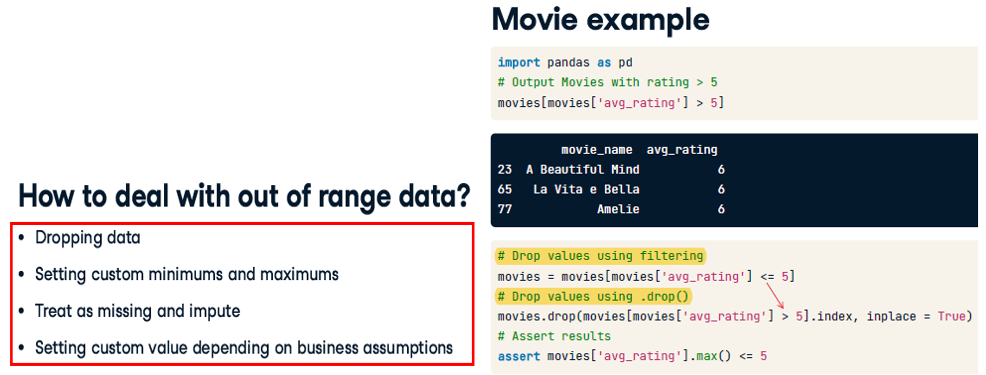

In [4]:
## Drop values using filtering

kept_movies = movies[movies['release_year'] <= 2022]


In [9]:
## Drop values using .drop()

kept_movies_2 = movies.drop(movies[movies['release_year'] < 2022].index, inplace =  True)

# """
# We set the inplace argument to True so that values are dropped in place and 
# we don't have to create a new column. 
# """

In [8]:
assert kept_movies['release_year'].max() <= 2022

# Remember, no output means it passed!!!

## Date range example

In [126]:
import pandas as pd
from datetime import datetime

In [130]:
movies.release_date.dtypes

dtype('O')

In [132]:
# # Convert to DateTime from object
movies['release_date'] = pd.to_datetime(movies['release_date'])
movies.release_date.dtypes

dtype('<M8[ns]')

In [133]:
# # Assert that conversion happened
assert movies['release_date'].dtype == 'datetime64[ns]'

In [135]:
"""

Now that the column is in datetime, we can treat it in a variety of ways. 
We first create a today_date variable using the datetime function 
date.today, which allows us to store today's date. We can then either drop 
the rows with exceeding dates similar to how we did in the average rating 
example, or replace exceeding values with today's date. In both cases we 
can use the assert statement to verify our treatment went well, by comparing
the maximum value in the subscription_date column. However, make sure to 
chain it with the dot-date() method to return a datetime object instead of
a timestamp.

"""

In [152]:
pd.to_datetime(today_date)

Timestamp('2021-12-25 00:00:00')

### Drop the data

In [138]:
# Drop values using filtering

# movies =  movies[movies['release_date'] < today_date]
type(movies.release_date)

pandas.core.series.Series

In [116]:
# # Drop values using .drop()

# movies.drop(movies[movies['release_date'] > today_date].index, inplace =  True)

In [121]:
movies.release_date.dtypes

dtype('O')

### Hardcode dates with upper limit

In [164]:
# movies.loc[movies['release_date'] > today_date, 'release_date'] = today_date

# assert movies.release_year.max().date() <= today_date

## Uniqueness constraints

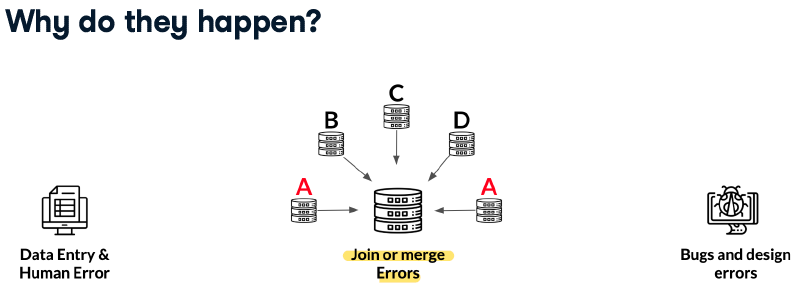

### Finding Duplicates

In [180]:
import pandas as pd
import matplotlib.pyplot as plt

movies = pd.read_csv('./Data/movies_new.csv')

print(movies.release_year.head(10))

0    2025.0
1    2023.0
2    2020.0
3    2019.0
4    2018.0
5    2017.0
6    2016.0
7    2014.0
8    2023.0
9    2025.0
Name: release_year, dtype: float64


In [181]:
duplicates = movies.release_year.duplicated()
print(duplicates.head(10))

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8     True
9     True
Name: release_year, dtype: bool


In [182]:
# Get duplicate rows
movies.release_year[duplicates]

8     2023.0
9     2025.0
12    2015.0
13    2015.0
14    2015.0
15    2015.0
16    2015.0
17    2015.0
18    2015.0
20       NaN
21       NaN
Name: release_year, dtype: float64

### How to find duplicate rows?

In [184]:
col_names = ['release_date']
duplicates = movies.duplicated(subset = col_names, keep = False)

In [185]:
# Output duplicate values
movies[duplicates]

,budget,revenue,original_title,genres,release_date,vote_average,release_year
0,150000000.0,1.513529e+09,Jurassic World,Action|Adventure|Science Fiction|Thriller,6/9/2015,12.5,2025.0
5,135000000.0,5.329505e+08,The Revenant,Western|Drama|Adventure|Thriller,12/25/2015,7.2,2017.0
9,175000000.0,8.537086e+08,Inside Out,Comedy|Animation|Family,6/9/2015,12.5,2025.0
15,44000000.0,1.557601e+08,The Hateful Eight,Crime|Drama|Mystery|Western,12/25/2015,7.4,2015.0
19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
# Output duplicate values
movies[duplicates].sort_values(by = "budget")

,budget,revenue,original_title,genres,release_date,vote_average,release_year
15,44000000.0,1.557601e+08,The Hateful Eight,Crime|Drama|Mystery|Western,12/25/2015,7.4,2015.0
5,135000000.0,5.329505e+08,The Revenant,Western|Drama|Adventure|Thriller,12/25/2015,7.2,2017.0
0,150000000.0,1.513529e+09,Jurassic World,Action|Adventure|Science Fiction|Thriller,6/9/2015,12.5,2025.0
9,175000000.0,8.537086e+08,Inside Out,Comedy|Animation|Family,6/9/2015,12.5,2025.0
19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### How to treat duplicate values?

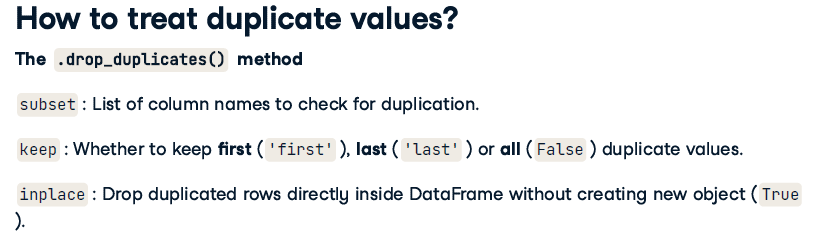

In [189]:
movies.drop_duplicates(inplace = True)